In [1]:
import os
import datetime as dt
import pandas as pd
import csv

### Importing Project Libraries

In [2]:
# add the 'src' directory as one where we can import modules
import sys
import pathlib # __file__ isn't recognized in Jupyter, so we need this to get the root path
path = pathlib.Path.cwd()
PROJ_ROOT = path.parent 
src_dir = str(PROJ_ROOT / 'src')
PROJ_ROOT = str(PROJ_ROOT)
sys.path.append(src_dir)
from data import make_dataset

### Confirm that the core data is up to date

In [3]:
manual_usernames = ['emily', '+vinny', 'jake', 'hayyogirl', 'Rabbit', 'username']
today = dt.date.today()
usernames = make_dataset.refresh_user_data(manual_usernames, PROJ_ROOT, today)
# Re-pulls raw data and refreshes basic interim data files: users_df.pkl 
# and a bunch for each user: filename + username + '.pkl'
#   contacts_df_, day_comm_log_df_, week_comm_log_df_
#   locations_df_, loc_log_df_, day_loc_log_df_, week_loc_log_df_

Interim users_df datafile exists
Data is up to date!


#### Set Interested Date Indices

In [4]:
date_indices = pd.date_range(today - dt.timedelta(35), today + dt.timedelta(0), freq='W-MON')
print(date_indices)

DatetimeIndex(['2018-10-22', '2018-10-29', '2018-11-05', '2018-11-12',
               '2018-11-19'],
              dtype='datetime64[ns]', freq='W-MON')


### Establish interim data path, open some data files

In [6]:
from data import user_df_setup

interim_data_file_path = os.path.join(PROJ_ROOT,
                                 "data",
                                 "interim",
                                 "full_users_df.pkl")
users_df = pd.read_pickle(interim_data_file_path)
raw_data_file_path = os.path.join(PROJ_ROOT,
                             "data",
                             "raw",
                             "users_df.pkl")
raw_users_df = pd.read_pickle(raw_data_file_path)

# raw_users_df
# raw_users_df[['username', 'timeCreated']].sort_values('timeCreated', ascending = False).head(20)
# all_users_df.sort_values('date_created', ascending = False).head(20)
# all_users_df.head(20)

#### Pulling communication, location data into user dictionaries

In [7]:
interim_data_path = os.path.join(PROJ_ROOT,
                                 "data",
                                 "interim")
raw_data_file_path = os.path.join(PROJ_ROOT,
                                 "data",
                                 "raw")
weekly_comm_dict = {}
contacts_dict = {}

weekly_loc_log_dict = {}
locations_dict = {}

for username in usernames:
    interim_comm_data_file_path = os.path.join(interim_data_path, 'week_comm_log_df_' + username + '.pkl')
    weekly_comm_df = pd.read_pickle(interim_comm_data_file_path)
    weekly_comm_dict[username] = weekly_comm_df
    
    interim_contact_data_file_path = os.path.join(interim_data_path, 'contacts_df_' + username + '.pkl')
    contacts_df = pd.read_pickle(interim_contact_data_file_path)
    contacts_dict[username] = contacts_df
    
    interim_loc_data_file_path = os.path.join(interim_data_path, 'week_loc_log_df_' + username + '.pkl')
    weekly_loc_log_df = pd.read_pickle(interim_loc_data_file_path)
    weekly_loc_log_dict[username] = weekly_loc_log_df
    
    locations_data_file_path = os.path.join(interim_data_path, 'locations_df_' + username + '.pkl')
    locations_df = pd.read_pickle(locations_data_file_path)
    locations_dict[username] = locations_df

In [8]:
weekly_loc_log_dict['+vinny'].columns

Index(['safe_loc_visits', 'risky_loc_visits', 'total_loc_visits',
       'days_w_safe_loc_visits', 'days_w_risky_loc_visits',
       'days_w_total_loc_visits', 'high_risky_loc_visits_day',
       'high_total_loc_visits_day', 'change_in_risky_loc_visits',
       'change_in_days_w_risky_loc_visits'],
      dtype='object')

#### Pulling notifictaion dict

In [9]:
notification_dict = make_dataset.make_notification_data(users_df, usernames, PROJ_ROOT)

Username not found: []
5b23b05adfd99a00113eefd9
                             timestamp                   type  \
_id                                                             
5be871f20eb5fd0010495da5  1.541960e+12       sent-sms-warning   
5be87a791dc2970010696d5e  1.541962e+12  outgoing-call-warning   
5be88b780eb5fd0010495daa  1.541967e+12       geofence-warning   
5be893ff0eb5fd0010495dab  1.541969e+12       geofence-warning   
5be89b470eb5fd0010495daf  1.541971e+12       geofence-warning   

                                            userId  
_id                                                 
5be871f20eb5fd0010495da5  5b23b05adfd99a00113eefd9  
5be87a791dc2970010696d5e  5b23b05adfd99a00113eefd9  
5be88b780eb5fd0010495daa  5b23b05adfd99a00113eefd9  
5be893ff0eb5fd0010495dab  5b23b05adfd99a00113eefd9  
5be89b470eb5fd0010495daf  5b23b05adfd99a00113eefd9  
5bec3a6b1dc2970010696def
                             timestamp                 type  \
_id                                  

## Plotting

In [10]:
from visualization import generate_report_charts

chart_path = os.path.join(PROJ_ROOT,
							"notebooks",
							"figures")

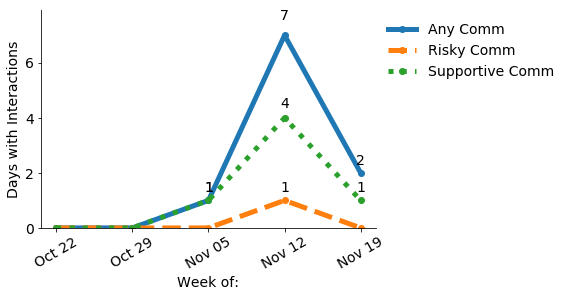

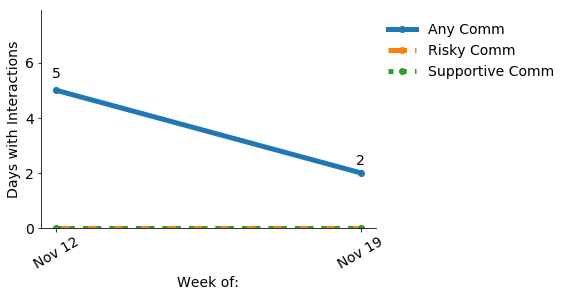

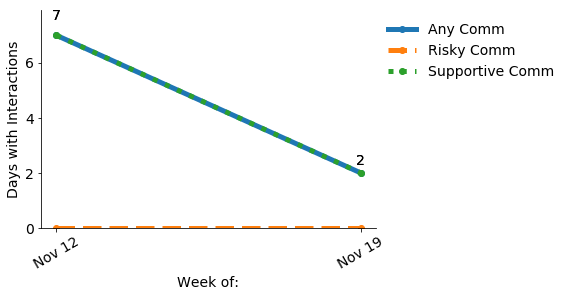

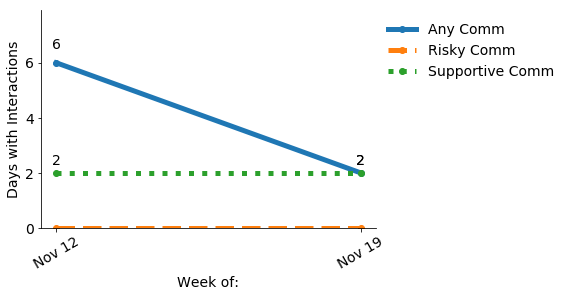

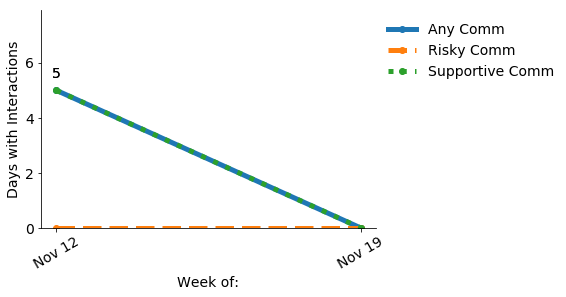

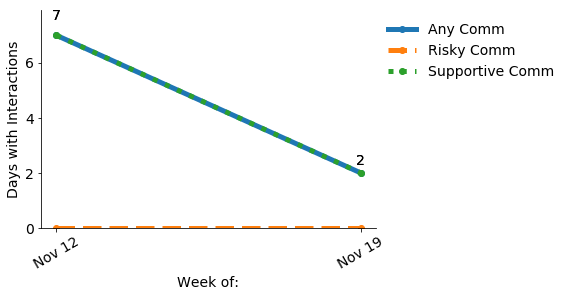

In [11]:
comm_days_line_chart_cols = ['total_comm_days', 'risky_comm_days', 'supportive_comm_days']

for username in usernames:
    comm_days_line_chart_data = weekly_comm_dict[username][comm_days_line_chart_cols]
#     comm_days_line_chart_data = comm_days_line_chart_data[min(date_indices):max(date_indices)]
    comm_days_line_chart_data = comm_days_line_chart_data[(comm_days_line_chart_data.index >= date_indices[0])]
#     comm_days_line_chart_data = comm_days_line_chart_data[(comm_days_line_chart_data.index >= date_indices[0]) & (comm_days_line_chart_data.index <= date_indices[-1])]
#     [comm_days_line_chart_data.index >= date_indices[0]]
    generate_report_charts.comm_days_line_chart([username], date_indices, comm_days_line_chart_data, chart_path)

In [12]:
print(comm_days_line_chart_data[(comm_days_line_chart_data.index >= min(date_indices))])

            total_comm_days  risky_comm_days  supportive_comm_days
2018-11-12              7.0              0.0                   7.0
2018-11-19              2.0              0.0                   2.0
2018-11-26              0.0              0.0                   0.0


Jupyter Notebook
Jupyter Notebook
Jupyter Notebook
Jupyter Notebook
Jupyter Notebook
Jupyter Notebook


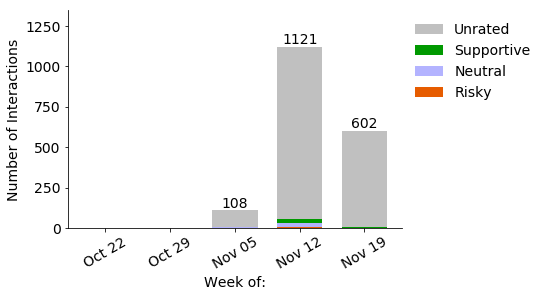

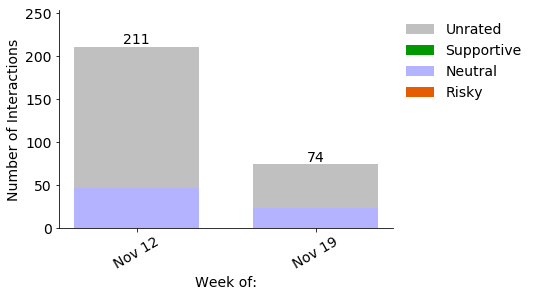

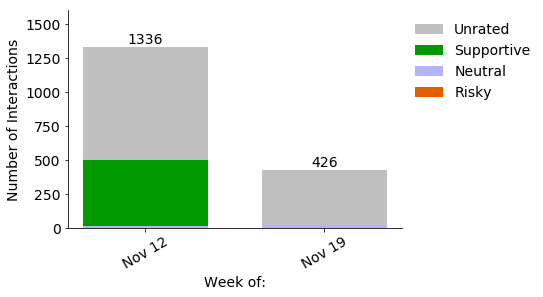

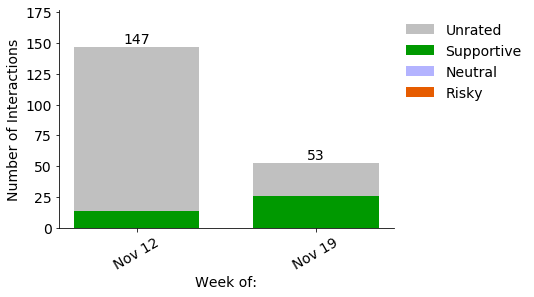

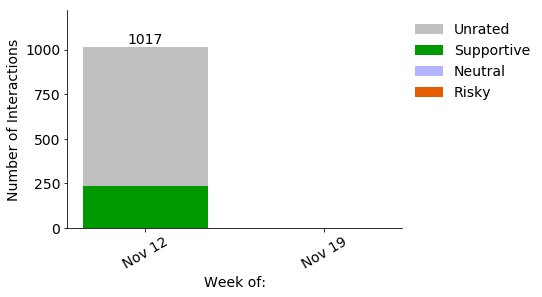

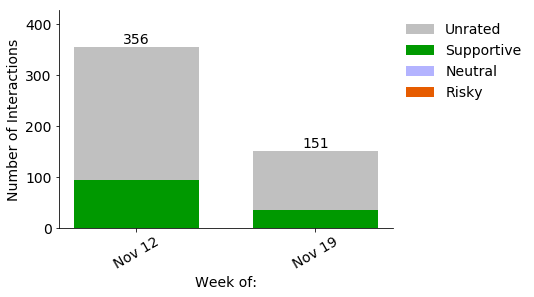

In [13]:
comm_vol_bar_chart_cols = ['total_comm', 'risky_comm', 'neutral_comm', 'supportive_comm', 'unrated_comm']

for username in usernames:
    comm_vol_bar_chart_data = weekly_comm_dict[username][comm_vol_bar_chart_cols]
#     print(comm_vol_bar_chart_data[comm_vol_bar_chart_data.index >= date_indices[0]])
    comm_vol_bar_chart_data = comm_vol_bar_chart_data[(comm_vol_bar_chart_data.index >= date_indices[0]) & (comm_vol_bar_chart_data.index <= date_indices[-1])]
    generate_report_charts.comm_vol_bar_chart([username], date_indices, comm_vol_bar_chart_data, chart_path)

    
    

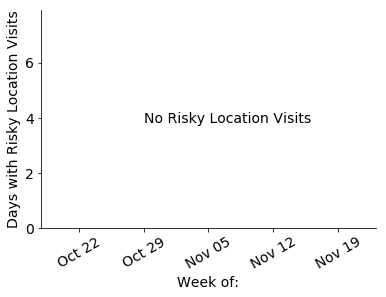

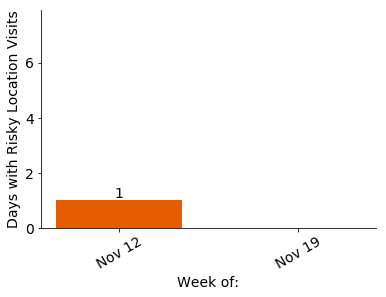

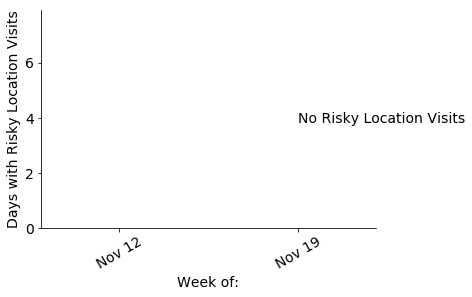

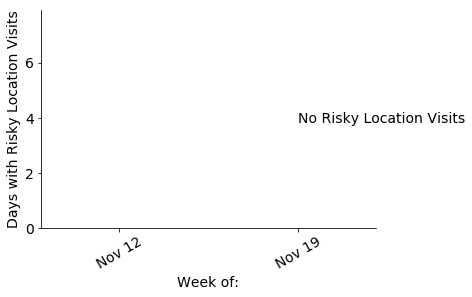

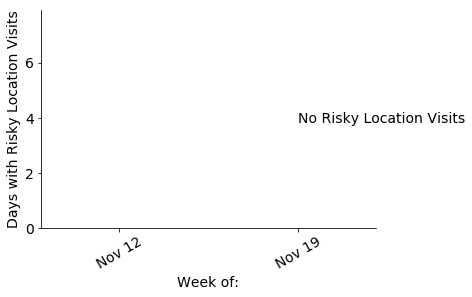

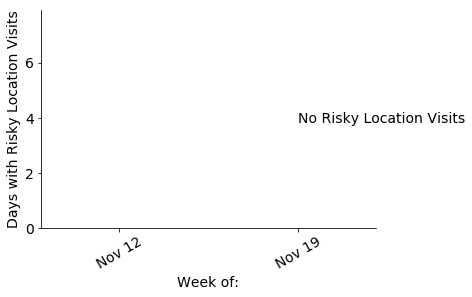

In [14]:
loc_days_bar_chart_cols = ['days_w_risky_loc_visits']

for username in usernames:
    loc_days_bar_chart_data = weekly_loc_log_dict[username][loc_days_bar_chart_cols]
#     print(comm_vol_bar_chart_data[comm_vol_bar_chart_data.index >= date_indices[0]])
    loc_days_bar_chart_data = loc_days_bar_chart_data[(loc_days_bar_chart_data.index >= date_indices[0]) & (loc_days_bar_chart_data.index <= date_indices[-1])]
    generate_report_charts.loc_days_bar_chart([username], date_indices, loc_days_bar_chart_data, chart_path)
# loc_days_bar_chart_cols = ['days_w_risky_loc_visits']

In [15]:
comm_pie_chart_cols = ['risky_percent', 'neutral_percent', 'supportive_percent', 'unrated_percent']
for username in usernames:
    comm_pie_chart_data = weekly_comm_dict[username][comm_pie_chart_cols]
    print(comm_pie_chart_data)
    if date_indices[-2] in comm_pie_chart_data.index:
        generate_report_charts.comm_pie_chart([username], date_indices[-2], comm_pie_chart_data[date_indices[-2]], chart_path)

            risky_percent  neutral_percent  supportive_percent  \
2018-06-11            NaN              NaN                 NaN   
2018-06-18            NaN              NaN                 NaN   
2018-06-25            NaN              NaN                 NaN   
2018-07-02            NaN              NaN                 NaN   
2018-07-09            NaN              NaN                 NaN   
2018-07-16            NaN              NaN                 NaN   
2018-07-23            NaN              NaN                 NaN   
2018-07-30            NaN              NaN                 NaN   
2018-08-06            NaN              NaN                 NaN   
2018-08-13            NaN              NaN                 NaN   
2018-08-20            NaN              NaN                 NaN   
2018-08-27            NaN              NaN                 NaN   
2018-09-03            NaN              NaN                 NaN   
2018-09-10            NaN              NaN                 NaN   
2018-09-17

KeyError: Timestamp('2018-11-12 00:00:00', freq='W-MON')

### Contact Rating Distribution

In [ ]:
# users_df.head
contacts_dict['+vinny']

In [ ]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(len(usernames),figsize=(10,15), sharex = True, sharey = True)
plt.tight_layout()

for count, e in enumerate(usernames):  
    unrated_threshold = users_df.loc[e, 'unrated_threshold']
    risky_threshold = users_df.loc[e, 'risky_threshold']
    supportive_threshold = users_df.loc[e, 'supportive_threshold']
    
    contacts_df = contacts_dict[e].sort_values('score', ascending = False)
    unrated = contacts_df['score'][contacts_df['score'] < unrated_threshold]
    risky = contacts_df['score'][(contacts_df['score'] >= unrated_threshold)
                                                     & (contacts_df['score'] <= risky_threshold)]
    neutral = contacts_df['score'][(contacts_df['score'] > risky_threshold)
                                                     & (contacts_df['score'] < supportive_threshold)]
    supportive = contacts_df['score'][(contacts_df['score'] >= supportive_threshold)]
    
    axarr[count].bar(supportive.index, supportive, 0.7, color = '#00cc00')
    axarr[count].bar(neutral.index, neutral, 0.7, color = 'b')
    axarr[count].bar(risky.index, risky, 0.7, color = '#ff6600')
    axarr[count].bar(unrated.index, unrated, 0.7, color = '#C0C0C0')
    axarr[count].set_title(e)